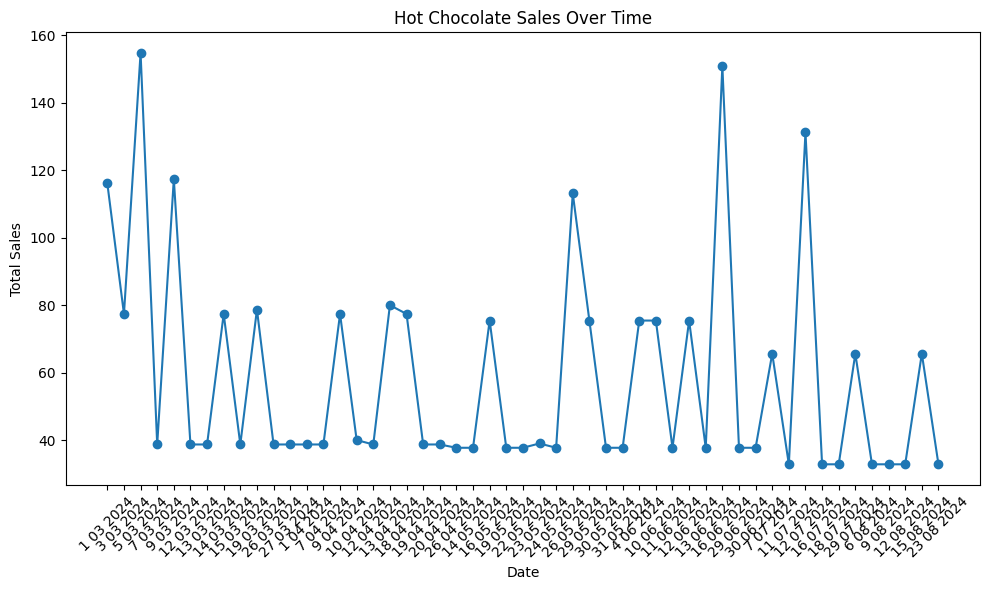

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- CONFIG ---
DB_PATH = Path(
    r"C:\Users\elbej\OneDrive\Documents\GitHub\ebejar-portfolio\Data-Analysis\DataAnalytics_Projects\data\coffee_sales.db"
)

# --- CONNECT & QUERY ---
conn = sqlite3.connect(DB_PATH)

query = """
SELECT
    coffee_sale_id,
    date,
    ROUND(SUM(money), 2) AS total_sales
FROM coffee_sales
WHERE coffee_name = 'Hot Chocolate'
GROUP BY date
ORDER BY coffee_sale_id ASC;
"""

df_sales = pd.read_sql_query(query, conn)
conn.close()

# --- PLOT ---
plt.figure(figsize=(10, 6))
plt.plot(df_sales["date"], df_sales["total_sales"], marker="o")
plt.title("Hot Chocolate Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
